In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv('SDSS_notOutliers.csv', index_col=0) # dataframe
print(df.shape) #(observaciones, variables)
df.describe()
df.head()

(49414, 15)


,SDSS,z,u_mag,sig_u_mag,g_mag,sig_g_mag,r_mag,sig_r_mag,i_mag,sig_i_mag,z_mag,sig_z_mag,FIRST,ROSAT,Mp
2,000008.13+001634.6,1.8365,20.233,0.054,20.200,0.024,19.945,0.032,19.491,0.032,19.191,0.068,0.0,-9.00,-25.738
4,000009.38+135618.4,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,18.331,0.024,18.110,0.033,-1.0,-9.00,-27.419
5,000009.42-102751.9,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,18.791,0.018,18.751,0.047,0.0,-9.00,-26.459
6,000011.41+145545.6,0.4596,19.637,0.030,19.466,0.024,19.362,0.022,19.193,0.025,19.005,0.047,-1.0,-9.00,-22.728
7,000011.96+000225.3,0.4790,18.237,0.028,17.971,0.020,18.025,0.019,17.956,0.014,17.911,0.029,0.0,-1.66,-24.046


# Relacion entre u_mag e i_mag
Esta relación suele observarse para encontrar galaxias activas, ya que estamos analizando todo el cielo esta información noos describira a todo el conjunto en general, por tanto el significado ligado a su relación es diferente

In [2]:
X = np.array(df['i_mag']).reshape((-1,1))
Y = np.array(df['u_mag'])

model = LinearRegression().fit(X ,Y)
R_sq = model.score(X, Y)

print('Coeficiente de determinacion: ',R_sq)
print('Intercepto (b0): ',model.intercept_)
print('Pendiente (b1): ',model.coef_)


Coeficiente de determinacion:  0.6858695310788843
Intercepto (b0):  1.3710674063358432
Pendiente (b1):  [0.95642167]


se ha de notar que en astronomia, a mayor distancia que observamos, encontramos distintas fases de evolución, pues observamos el pasado, por ello todo analisis ha de conllevar un filtrado en esta escala, en 'z'

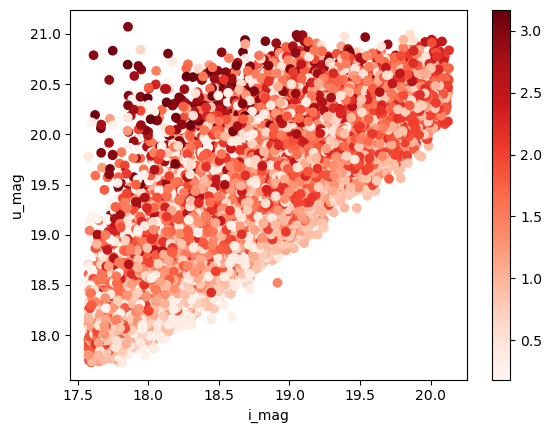

In [4]:
plotui = plt.scatter(data=df, x='i_mag', y='u_mag', c='z', cmap='Reds')
plt.colorbar(plotui)
plt.xlabel('i_mag')
plt.ylabel('u_mag')
plt.show()

Relacion z con i_mag y z_mag
luego relacion i_mag y z_mag

es una correlacion causa y efecto o solo aparecen juntas?
la correlacion solo nos entrega lo observado, esta en el conocimiento e interpretacion poder dar un argumento mas fuerte como la relacion causa y efecto

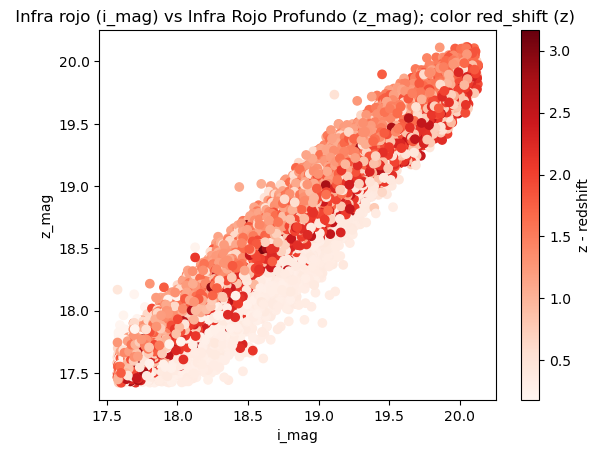

In [5]:
plotzi = plt.scatter(data=df, x='i_mag', y='z_mag', c='z', cmap='Reds')
cb = plt.colorbar(plotzi)
cb.set_label('z - redshift')


plt.xlabel('i_mag')
plt.ylabel('z_mag')
plt.title(' Infra rojo (i_mag) vs Infra Rojo Profundo (z_mag); color red_shift (z)  ')
plt.show()

# Como afectan las correlaciones distintos redshift


en el caso de u_mag e i_mag esta correlacion es independiente del redshift, y parece bastante dispersa

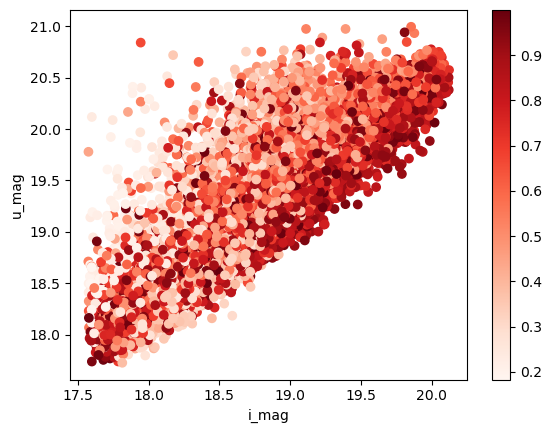

In [6]:
filter_z = df[ df.z < 1 ]


plotui = plt.scatter(data=filter_z, x='i_mag', y='u_mag', c='z', cmap='Reds')
plt.colorbar(plotui)
plt.xlabel('i_mag')
plt.ylabel('u_mag')
plt.show()

radio y i_mag
esta por lo que lei se suele encontrar en formacion

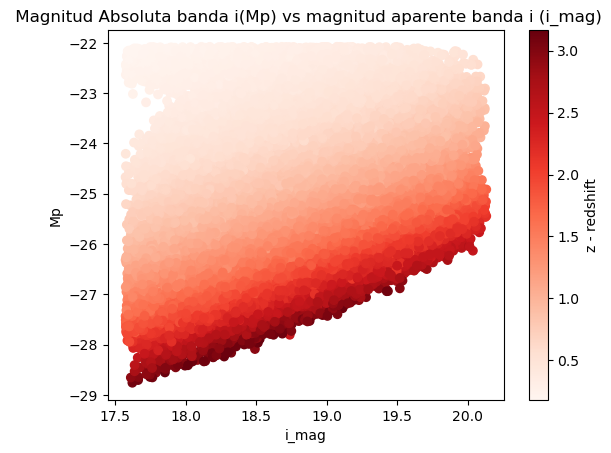

In [4]:
variable = 'Mp'

plot = plt.scatter(data=df, x='i_mag', y=variable, c='z', cmap='Reds')
cb = plt.colorbar(plot)
cb.set_label('z - redshift')

plt.xlabel('i_mag')
plt.ylabel(variable)


plt.title(' Magnitud Absoluta banda i(Mp) vs magnitud aparente banda i (i_mag)')
plt.show()


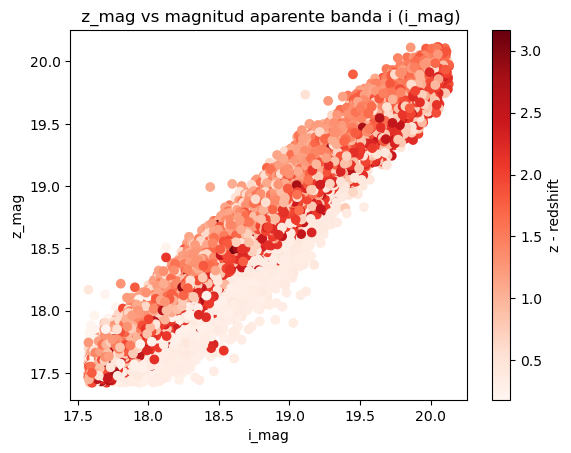

In [5]:
variable = 'z_mag'

plot = plt.scatter(data=df, x='i_mag', y=variable, c='z', cmap='Reds')
cb = plt.colorbar(plot)
cb.set_label('z - redshift')

plt.xlabel('i_mag')
plt.ylabel(variable)


plt.title(f' {variable} vs magnitud aparente banda i (i_mag)')
plt.show()

# Relacion  Mp y z

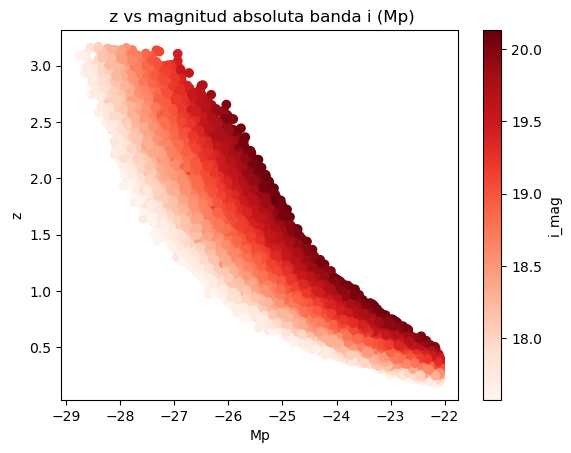

In [10]:
variable = 'z'


plot = plt.scatter(data=df, x='Mp', y=variable, c='i_mag', cmap='Reds')
cb = plt.colorbar(plot)
cb.set_label('i_mag')

plt.xlabel('Mp')
plt.ylabel(variable)


plt.title(f' {variable} vs magnitud absoluta banda i (Mp)')
plt.show()

la magnitud aparente se obtiene

$$
M = m - \log_10 (d) - K(z) - E(z) 
$$

donde $K$ es un K corrector para un redshift 0.1,
$E(z)$ es un correcto para evolucion
$$
E(z) = 1.6(z-0.1)
$$